# NFL Data Analysis
*Created By Kyle Chambers*  
*December 12th 2019*


## Third Down & Fourth Down Conversions

This was a project created to analyze NFL conversion statistics into a new easy to read method. Here we will look at third down conversions as well as fourth down. At the end, we will determine if there is correlation with being successful on third and fourth down and having a winning franchise.

### Understanding Third and 4th Down Possessions

Each team's offense is given four plays to move ten yards toward the opponent's end zone. If unsuccessful after the first three attempts, it becomes fourth down. 

Here the team can decide to "go for it" on fourth down and try to gain the remaining yards, but they run the risk of turning the ball over to the other team if they do not get to the first down marker. If they do not get the required yardage, the other team takes possession of the ball at the spot of the last tackle and will have four downs to move ten yards back in the other direction.

Often times, teams will decide to "punt" the ball away on fourth down. A punt gives possession of the ball to the other team but also distances them farther away from the end zone, making it more difficult to score..

Data Source(s):
https://www.pro-football-reference.com/years/2019/

### Gathering Data

Steps Taken:
1. Gather Data from pro-football reference site using Beautiful Soup 4 and Selenium
2. Import into pandas dataframe
3. Using pyplot, visualize the data gathered
4. Determine Top Converters in the league
5. What percentage of wins do they account for?


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from bs4 import BeautifulSoup
from bs4 import Comment
%matplotlib inline

def header(msg):
    print('-' * 50)
    print('[' + msg + ']')
    print('-' * 50)
    
year = 2019
url = 'https://www.pro-football-reference.com/years/2019/#all_team_conversions'.format(year)
response = requests.get(url)

soup = BeautifulSoup(response.text, 'html.parser')
comments = soup.find_all(string=lambda text: isinstance(text, Comment))

tables = []
for each in comments:
    if 'table' in each:
        try:
            tables.append(pd.read_html(each)[0])
        except:
            continue
            
#Standings tables
afc = tables[1]
nfc = tables[2]

#picking conversions table on page
df = tables[9] 
df.to_csv(r'C:\Users\kylec\OneDrive\Desktop\PY\plots\old_conversions.csv')
table = pd.read_csv('old_conversions.csv', skiprows=list(range(1)))
table.to_csv('conversions.csv')
df = pd.read_csv('conversions.csv')
#table cleanup
df = df.dropna()
#df["3D%"] = df["3D%"].astype(float)
df['3D%'] = df['3D%'].str.rstrip('%').astype('float') 
df['4D%'] = df['4D%'].str.rstrip('%').astype('float') 
#display(df.sort_values('3D%', ascending=False))

## Gathering Data using BeautifulSoup4

Next we parse the html with BeautifulSoup so that we can work with a nicer, nested BeautifulSoup data structure.

1. Gather Data from source site using Beautiful Soup 4 and Selenium
2. Create pandas dataframe
3. Using pyplot, visualize the data gathered

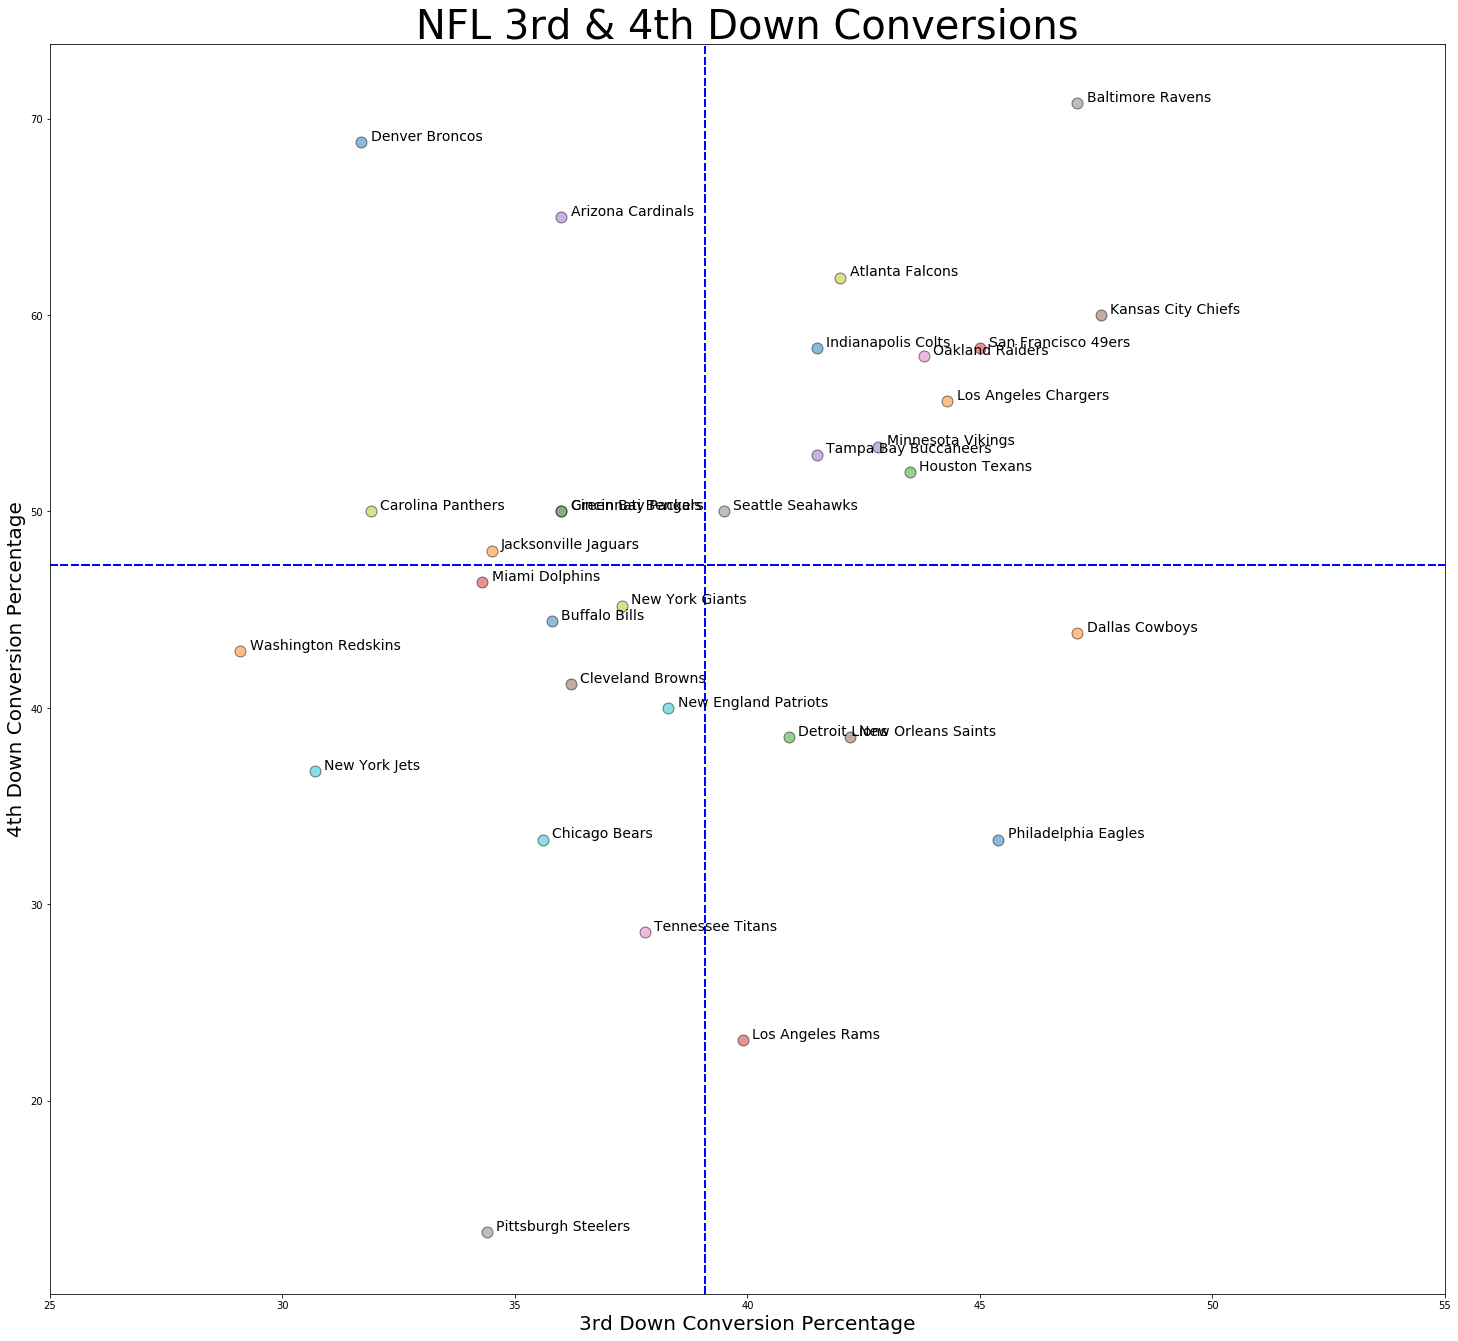

In [3]:
# Create scatter plot
plt.figure(figsize=(25,23))
plt.title("NFL 3rd & 4th Down Conversions", fontsize=40)

# simulating a pandas df['team'] column
types = df.Tm
x_coords = df['3D%']
y_coords = df['4D%']
binsy = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
binsx = [25,30,35,40,45,50,55]

#calculating averages
avg_x = x_coords.mean()
avg_x = round(avg_x, 1)
avg_y = y_coords.mean()
avg_y = round(avg_y, 1)

#identifying elite teams above avg in both catagories
elite=[]
for index, row in df.iterrows():
    if row['3D%'] > avg_x and row['4D%'] > avg_y:
        elite.append(row)
df_1 = pd.DataFrame(elite)
        
for i,type in enumerate(types):
    x = x_coords[i]
    y = y_coords[i]
    plt.scatter(x, y, s=120, marker='o', edgecolor='black', cmap='purple', linewidth=1, alpha = 0.5)
    plt.text(x+0.2, y+0.1, type, fontsize=14)
    plt.xlabel('3rd Down Conversion Percentage',fontsize=20)
    plt.ylabel('4th Down Conversion Percentage', fontsize=20)
    plt.xticks(binsx)
    #plt.yticks(binsy)
    plt.axvline(avg_x,color='blue',ls='--', linewidth=2)
    plt.axhline(avg_y,color='blue',ls='--', linewidth=2)
    
#plt.savefig('3rd and 4th Down figure', dpi =300)
#plt.show()

### Average 3rd and 4th Down Percentages
The averages of each down can be dispayed below:

In [50]:
display("3rd Down Percentage is {}".format(avg_x))
display("4th Down Percentage is {}".format(avg_y))

'3rd Down Percentage is 39.1'

'4th Down Percentage is 47.3'

,Unnamed: 0,Unnamed: 0.1,Rk,Tm,G,3DAtt,3DConv,3D%,4DAtt,4DConv,4D%,RZAtt,RZTD,RZPct
3,3,3,4.0,San Francisco 49ers,16.0,200.0,90.0,45.0,12.0,7.0,58.3,62.0,33.0,53.2%
4,4,4,5.0,Tampa Bay Buccaneers,16.0,217.0,90.0,41.5,17.0,9.0,52.9,54.0,35.0,64.8%
5,5,5,6.0,Kansas City Chiefs,16.0,187.0,89.0,47.6,10.0,6.0,60.0,50.0,27.0,54.0%
6,6,6,7.0,Oakland Raiders,16.0,201.0,88.0,43.8,19.0,11.0,57.9,53.0,28.0,52.8%
7,7,7,8.0,Baltimore Ravens,16.0,187.0,88.0,47.1,24.0,17.0,70.8,64.0,43.0,67.2%
8,8,8,9.0,Atlanta Falcons,16.0,207.0,87.0,42.0,21.0,13.0,61.9,60.0,31.0,51.7%
10,10,10,11.0,Indianapolis Colts,16.0,207.0,86.0,41.5,24.0,14.0,58.3,56.0,36.0,64.3%
11,11,11,12.0,Los Angeles Chargers,16.0,194.0,86.0,44.3,18.0,10.0,55.6,53.0,28.0,52.8%
12,12,12,13.0,Houston Texans,16.0,193.0,84.0,43.5,25.0,13.0,52.0,53.0,34.0,64.2%
14,14,14,15.0,Minnesota Vikings,16.0,194.0,83.0,42.8,15.0,8.0,53.3,56.0,34.0,60.7%


Text(0.5, 1.0, 'League Win Totals')

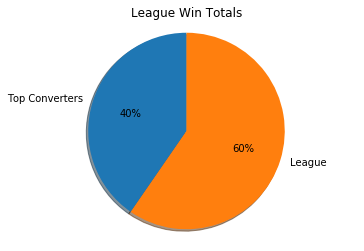

In [49]:
#Standings tables
afc = tables[1]
nfc = tables[2]
#Merging the dataframes for each conference;
frames = [afc,nfc]
result = pd.concat(frames, sort=False)
result['Tm'] = result['Tm'].str.rstrip('(*)').str.rstrip('123456').str.rstrip(' (')
elite_ = df_1.merge(result[['Tm', 'W', 'Position']], on=['Tm'], how='left',sort=True)
#Calculating the pie
elite_Wins = elite_['W'].sum()
league_Wins = result['W'].sum()
difference = league_Wins - elite_Wins
account_for = (elite_Wins * 100 / league_Wins).round(1)
display(df_1)
#PYPlot
labels = ['Top Converters', 'League']
sizes = [elite_Wins, difference]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.0f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('League Win Totals')
#df.loc['Total'] = pd.Series(df['MyColumn'].sum(), index = ['MyColumn'])
#plt.figure(figsize=(25,23))


36.8

Text(0.5, 1.0, 'League Yard Totals')

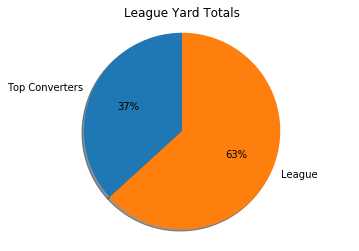

In [48]:
#Calculating percentage of total yards
total_off = tables[3]
total_off.to_csv(r'C:\Users\kylec\OneDrive\Desktop\PY\plots\old_total_off.csv')
total_off = pd.read_csv('old_total_off.csv', skiprows=list(range(1)))
total_off.to_csv('total_off.csv')

elite_total_off = df_1.merge(total_off[['Tm','PF', 'Yds', 'Y/P']], on=['Tm'], how='left',sort=True)
league_total_off = df.merge(total_off[['Tm','PF','Yds','Y/P']], on=['Tm'], how='left',sort=True)
elite_total = elite_total_off['Yds'].sum()
league_total = league_total_off['Yds'].sum()
difference_total = league_total - elite_total

account_total = (elite_total * 100 / league_total).round(1)
display(account_total)

yds_labels = ['Top Converters', 'League']
sizes = [elite_total, difference_total]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.0f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('League Yard Totals')
